# Binary Classification with Both Algorithms

### predict whether a person has diabetes.

#### a.Load the dataset

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
path = 'diabetes.csv'
df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
features = ["Glucose", "BloodPressure", "BMI", "Age"]
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

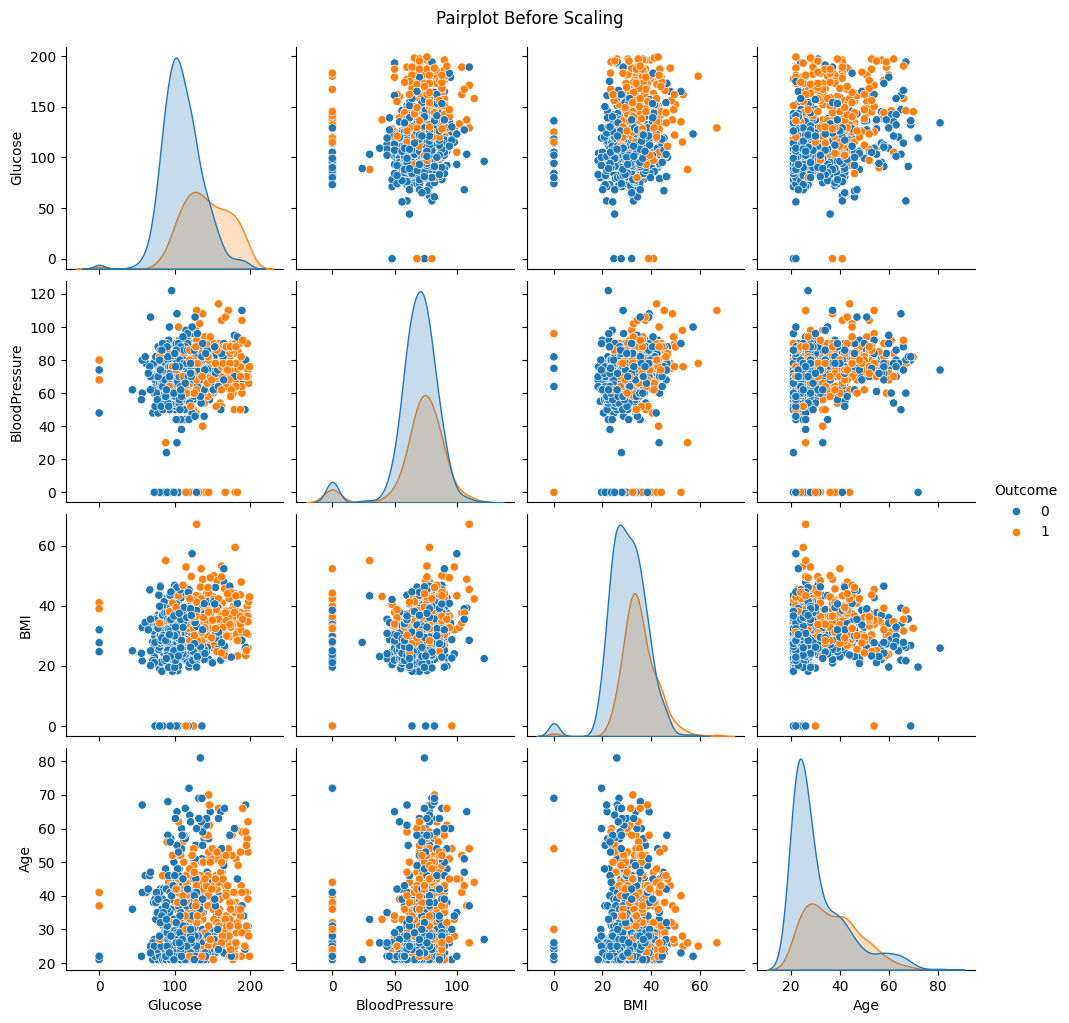

In [7]:
sns.pairplot(df[features + ["Outcome"]], hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot Before Scaling", y=1.02)
plt.show()

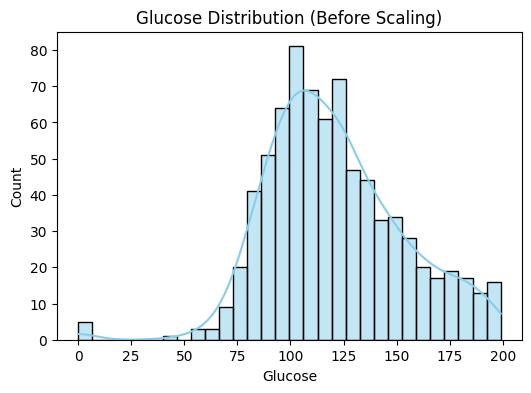

In [8]:
# Distribution for one feature
plt.figure(figsize=(6,4))
sns.histplot(df["Glucose"], bins=30, kde=True, color="skyblue")
plt.title("Glucose Distribution (Before Scaling)")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

#### b.Train and evaluate both models.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df["Outcome"] = y_train.reset_index(drop=True)

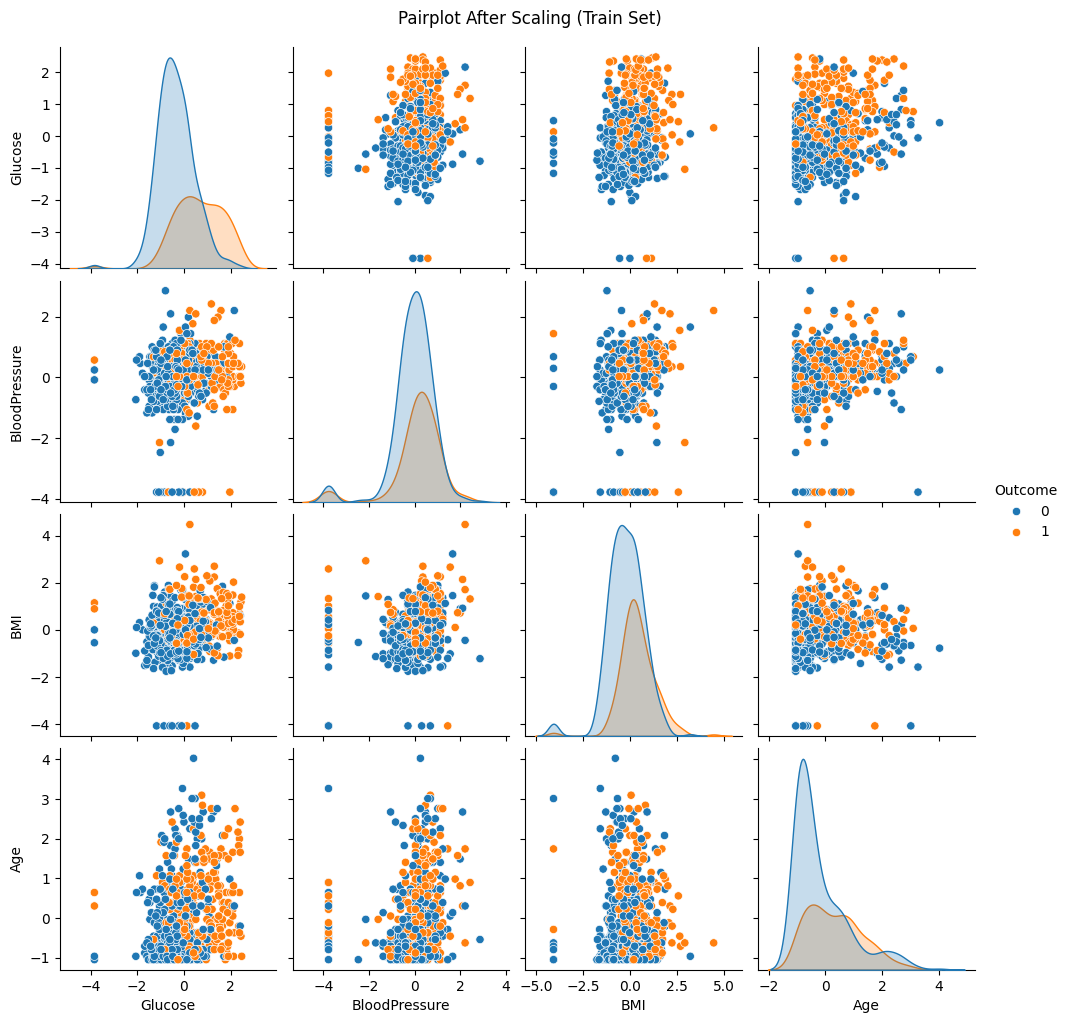

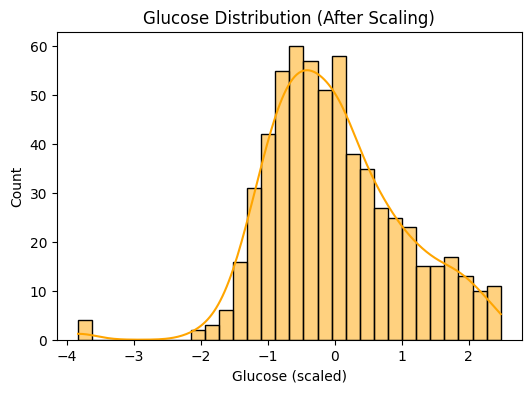

In [10]:
sns.pairplot(scaled_df[features + ["Outcome"]], hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot After Scaling (Train Set)", y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(scaled_df["Glucose"], bins=30, kde=True, color="orange")
plt.title("Glucose Distribution (After Scaling)")
plt.xlabel("Glucose (scaled)")
plt.ylabel("Count")
plt.show()

In [11]:
# Logistic Regression
lr = LogisticRegression(solver="liblinear", random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [12]:
# KNN with Grid Search
param_grid = {"n_neighbors": list(range(3, 21, 2))}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)
best_k = knn_cv.best_params_["n_neighbors"]
knn = knn_cv.best_estimator_
y_pred_knn = knn.predict(X_test_scaled)

In [13]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model(f"KNN (k={best_k})", y_test, y_pred_knn)



Logistic Regression
Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-score : 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


KNN (k=13)
Accuracy : 0.7597402597402597
Precision: 0.6808510638297872
Recall   : 0.5925925925925926
F1-score : 0.6336633663366337

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



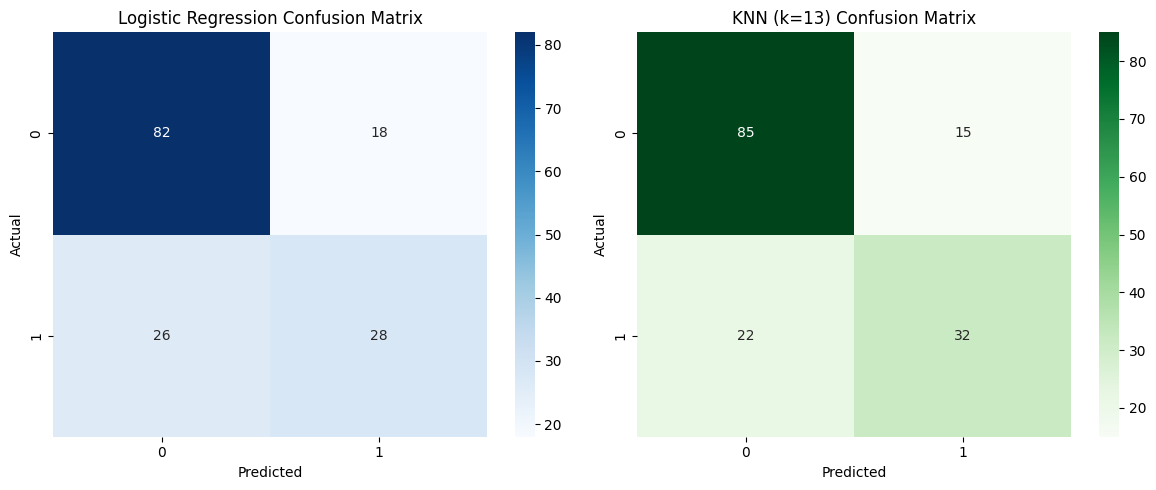

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f"KNN (k={best_k}) Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()